In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("customer_churn_data.csv", index_col="customerID")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
CUST0002,Male,1,No,No,51,Yes,No,DSL,No,Yes,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,No,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5880 entries, CUST0000 to CUST5879
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5880 non-null   object 
 1   SeniorCitizen     5880 non-null   int64  
 2   Partner           5880 non-null   object 
 3   Dependents        5880 non-null   object 
 4   tenure            5880 non-null   int64  
 5   PhoneService      5880 non-null   object 
 6   MultipleLines     5880 non-null   object 
 7   InternetService   5880 non-null   object 
 8   OnlineSecurity    5880 non-null   object 
 9   OnlineBackup      5880 non-null   object 
 10  DeviceProtection  5880 non-null   object 
 11  TechSupport       5880 non-null   object 
 12  StreamingTV       5880 non-null   object 
 13  StreamingMovies   5880 non-null   object 
 14  Contract          5880 non-null   object 
 15  PaperlessBilling  5880 non-null   object 
 16  PaymentMethod     5880 non-null   ob

In [4]:
object_cols = df.select_dtypes(include='object').columns

object_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [5]:
def numericize_col(df, object_cols):
    for col in object_cols:
        df[f'{col}_encoded'] = pd.factorize(df[col])[0]
    return df

In [6]:
df = numericize_col(df,object_cols)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded,PaperlessBilling_encoded,PaymentMethod_encoded,Churn_encoded
customerID,,,,,,,,,,,,,,,,,,,,,
CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,No internet service,...,0,0,0,0,0,0,0,0,0,0
CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,No,...,1,1,1,1,1,1,0,1,1,1
CUST0002,Male,1,No,No,51,Yes,No,DSL,No,Yes,...,2,2,1,2,2,1,1,1,2,1
CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,No,...,1,1,1,1,2,1,0,1,3,0
CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,No,...,2,1,2,2,2,2,0,1,2,1


In [7]:
df = df.drop(object_cols, axis=1)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded,PaperlessBilling_encoded,PaymentMethod_encoded,Churn_encoded
customerID,,,,,,,,,,,,,,,,,,,,
CUST0000,0,23,49.85,1146.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CUST0001,0,43,100.70,4330.10,1,1,1,0,0,1,1,1,1,1,1,1,0,1,1,1
CUST0002,1,51,97.33,4963.83,0,0,1,1,1,1,2,2,1,2,2,1,1,1,2,1
CUST0003,1,72,101.38,7299.36,0,0,1,1,2,1,1,1,1,1,2,1,0,1,3,0
CUST0004,1,25,52.22,1305.50,0,0,1,1,2,1,2,1,2,2,2,2,0,1,2,1


<AxesSubplot: >

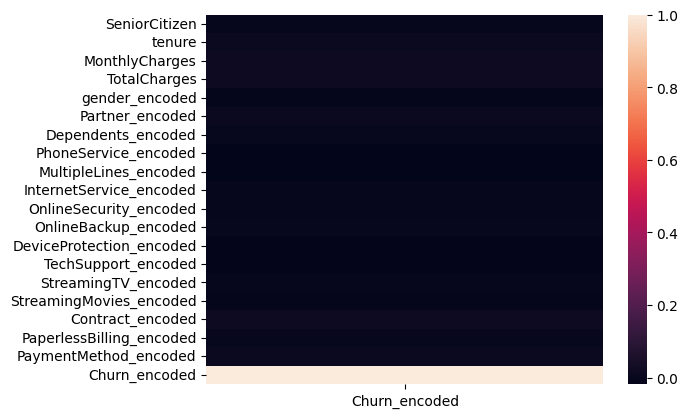

In [8]:
sns.heatmap(df.corr()[['Churn_encoded']])

In [9]:
X = df.drop('Churn_encoded', axis=1)
y = df['Churn_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.49
Confusion Matrix:
[[379 205]
 [397 195]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.65      0.56       584
           1       0.49      0.33      0.39       592

    accuracy                           0.49      1176
   macro avg       0.49      0.49      0.48      1176
weighted avg       0.49      0.49      0.47      1176



In [14]:
model_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
model_coefficients

,Feature,Coefficient
0,SeniorCitizen,-0.010230
1,tenure,-0.001656
2,MonthlyCharges,-0.000915
3,TotalCharges,0.000033
4,gender_encoded,-0.006835
5,Partner_encoded,0.017495
6,Dependents_encoded,-0.004004
7,PhoneService_encoded,-0.031137
8,MultipleLines_encoded,-0.045315
9,InternetService_encoded,0.012121
